In [34]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import *
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances

In [37]:
enga_centr = pd.read_csv("../data/centero_engagment.csv")
enga_centr = enga_centr.iloc[:, 1:]
enga_centr

,Total UL and DL,Dur. (ms),sessions frequency
0,-0.018266,5.431628,0.046955
1,-0.009948,1.332984,-0.210176
2,1.256253,-0.241265,-0.218358
3,-1.266658,-0.253828,-0.220158
4,0.010122,-0.050115,2.807734
5,-0.002853,-0.416422,-0.232556


In [38]:
enga_metr = pd.read_csv("../data/std_engagement.csv")
enga_metr.index = enga_metr["MSISDN/Number"]
enga_metr = enga_metr.iloc[:, 1:4]
enga_metr.head()


,Total UL and DL,Dur. (ms),sessions frequency
MSISDN/Number,,,
3.360100e+10,-1.158862,20.571127,-0.495197
3.360100e+10,0.921507,15.109232,-0.495197
3.360100e+10,-0.575403,15.069424,-0.495197
3.360101e+10,2.095055,14.589959,-0.495197
3.360101e+10,0.701781,11.820586,0.731244


In [39]:
engagement_score = euclidean_distances(
    enga_metr.values.tolist(), [enga_centr.values.tolist()[0]]
)
engagement_score


array([[15.19208078],
       [ 9.73822996],
       [ 9.66909777],
       ...,
       [ 4.61464489],
       [ 4.66646744],
       [ 4.70325266]])

In [40]:
engagement_score = [val[0] for val in engagement_score.tolist()]
engagement_score[:2]


[15.192080784619563, 9.738229960336461]

In [41]:
exper_centr = pd.read_csv("../data/centro_experience.csv")
exper_centr = exper_centr.iloc[:, 1:]
exper_centr


,Average RTT,Average TCP,Average throughput
0,0.750116,-0.506050,-0.744422
1,-1.230701,0.827638,-0.152066
2,0.518475,-0.346097,1.408331


In [42]:
exper_metr = pd.read_csv("../data/std_experience.csv")
exper_metr.index = exper_metr["MSISDN/Number"]
exper_metr = exper_metr.iloc[:106856, 1:4]
exper_metr


,Average TCP,Average throughput,Average RTT
MSISDN/Number,,,
3.366117e+10,-1.357519,15.220434,0.510533
3.369817e+10,0.711986,11.928930,-0.596697
3.367251e+10,-1.480467,11.918292,-0.714487
3.365169e+10,-1.396600,10.960414,-0.855836
3.366856e+10,0.692157,10.681835,-0.596697
...,...,...,...
3.361648e+10,0.761222,-0.552987,-0.855836
3.362400e+10,0.761222,-0.552987,-1.303439
3.376193e+10,0.761222,-0.552987,-0.125535


In [43]:

experience_score = euclidean_distances(
    exper_metr.values.tolist(), [exper_centr.values.tolist()[0]]
)
experience_score


array([[15.91663653],
       [12.43591568],
       [12.62302166],
       ...,
       [ 0.62076363],
       [ 0.32701291],
       [ 1.99664168]])

In [44]:
experience_score = [val[0] for val in experience_score.tolist()]
experience_score[:2]


[15.916636529999163, 12.4359156801666]

In [45]:
df = pd.DataFrame()
df["engagement_score"] = engagement_score
df["experience_score"] = experience_score
df.index = enga_metr.index
# result
df.head()


,engagement_score,experience_score
MSISDN/Number,,
3.360100e+10,15.192081,15.916637
3.360100e+10,9.738230,12.435916
3.360100e+10,9.669098,12.623022
3.360101e+10,9.414621,11.666216
3.360101e+10,6.465718,11.189011


In [46]:
df["satisfaction_score"] = (df["engagement_score"] + df["experience_score"]) / 2
df.head()


,engagement_score,experience_score,satisfaction_score
MSISDN/Number,,,
3.360100e+10,15.192081,15.916637,15.554359
3.360100e+10,9.738230,12.435916,11.087073
3.360100e+10,9.669098,12.623022,11.146060
3.360101e+10,9.414621,11.666216,10.540418
3.360101e+10,6.465718,11.189011,8.827364


In [47]:
top10_satisfied_customers = df.sort_values(
    by="satisfaction_score", ascending=False
).iloc[:10, :]
top10_satisfied_customers.to_csv("../data/top10_satisfied_customers.csv")
top10_satisfied_customers


,engagement_score,experience_score,satisfaction_score
MSISDN/Number,,,
3.360100e+10,15.192081,15.916637,15.554359
3.362632e+10,21.296090,4.031117,12.663603
3.361489e+10,20.047971,5.138084,12.593027
3.362578e+10,20.110156,3.021788,11.565972
3.360100e+10,9.669098,12.623022,11.146060
3.360100e+10,9.738230,12.435916,11.087073
3.360101e+10,9.414621,11.666216,10.540418
3.365973e+10,18.700767,0.817626,9.759196
3.360313e+10,14.092319,5.300125,9.696222


In [48]:
train_df = enga_metr.copy(deep=True)
train_df["Average TCP"] = exper_metr["Average TCP"].to_list()
train_df["Average RTT"] = exper_metr["Average RTT"].to_list()
train_df["Average throughput"] = exper_metr["Average throughput"].to_list()
# Adding our average satisfaction score (this is going to be our predicted value)
train_df["satisfaction_score"] = df["satisfaction_score"].to_list()
train_df.head()


,Total UL and DL,Dur. (ms),sessions frequency,Average TCP,Average RTT,Average throughput,satisfaction_score
MSISDN/Number,,,,,,,
3.360100e+10,-1.158862,20.571127,-0.495197,-1.357519,0.510533,15.220434,15.554359
3.360100e+10,0.921507,15.109232,-0.495197,0.711986,-0.596697,11.928930,11.087073
3.360100e+10,-0.575403,15.069424,-0.495197,-1.480467,-0.714487,11.918292,11.146060
3.360101e+10,2.095055,14.589959,-0.495197,-1.396600,-0.855836,10.960414,10.540418
3.360101e+10,0.701781,11.820586,0.731244,0.692157,-0.596697,10.681835,8.827364


In [49]:
train_data = train_df.iloc[: int(len(train_df) * 0.8), :]
test_data = train_df.iloc[int(len(train_df) * 0.8) :, :]


In [50]:
train_x = train_data.iloc[:, :-1]
train_y = train_data.iloc[:, -1:]
#
test_x = test_data.iloc[:, :-1]
test_y = test_data.iloc[:, -1:]


In [51]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    train_x, train_y, test_size=0.2, random_state=40
)


In [52]:
alpha_val = 0.8
rr = Ridge(alpha=alpha_val)
rr.fit(xtrain, ytrain)
# Validation value of the model
validation_score = rr.score(xtest, ytest)
print("The model score is: {:.5f}".format(validation_score))


The model score is: 0.88214


In [53]:
# Training the best Model(Ridge) on the whole train data
rr.fit(train_x, train_y)
# Test on the test data
final_score = rr.score(test_x, test_y)
print("The model final score is: {:.5f}".format(final_score))


The model final score is: 0.82108


In [54]:
from joblib import dump

# Saving the final Model using joblibs dump
dump(rr, "../models/satisfaction_model.joblib")


['../models/satisfaction_model.joblib']

In [55]:
cluster_df = df.iloc[:, :2]
cluster_df.head()


,engagement_score,experience_score
MSISDN/Number,,
3.360100e+10,15.192081,15.916637
3.360100e+10,9.738230,12.435916
3.360100e+10,9.669098,12.623022
3.360101e+10,9.414621,11.666216
3.360101e+10,6.465718,11.189011


In [56]:
km = KMeans(init="random", n_clusters=2, n_init=10, max_iter=300, random_state=42)
label = km.fit_predict(cluster_df)
centroids = km.cluster_centers_


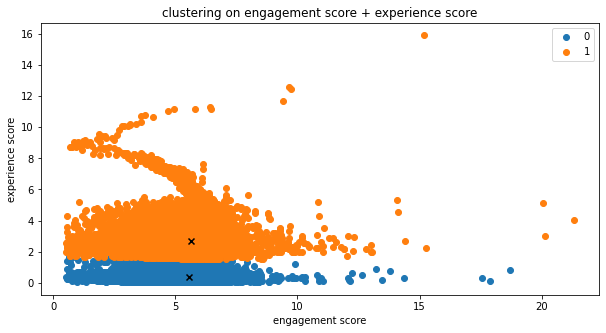

In [57]:
plt.figure(figsize=(10, 5))
u_labels = np.unique(label)
plt.title(f"clustering on engagement score + experience score")
for i in u_labels:
    plt.scatter(
        cluster_df[label == i].iloc[:, 0],
        cluster_df[label == i].iloc[:, 1],
        marker="o",
        label=i,
    )
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", color="black")
plt.xlabel("engagement score")
plt.ylabel("experience score")
plt.legend()
plt.show()


In [58]:
df["cluster"] = label
df.head()
df.to_csv("../data/score_table.csv")
